In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


 CONVOLUTIONAL AUTOENCODERS:

In [ ]:
# Normalize the data (0-255 to 0-1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
# Reshape the data to add the channel dimension
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [ ]:
# Build the autoencoder model

# Encoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

In [ ]:
# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
# Autoencoder model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
# Train the model
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.3599 - val_loss: 0.1076
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1023 - val_loss: 0.0902
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0894 - val_loss: 0.0841
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0844 - val_loss: 0.0810
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0814 - val_loss: 0.0793
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0796 - val_loss: 0.0778
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0783 - val_loss: 0.0767
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0773 - val_loss: 0.0761
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0766 - val_loss: 0.0753
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0760 - val_loss: 0.0749


In [ ]:
# Predict the reconstructed images
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


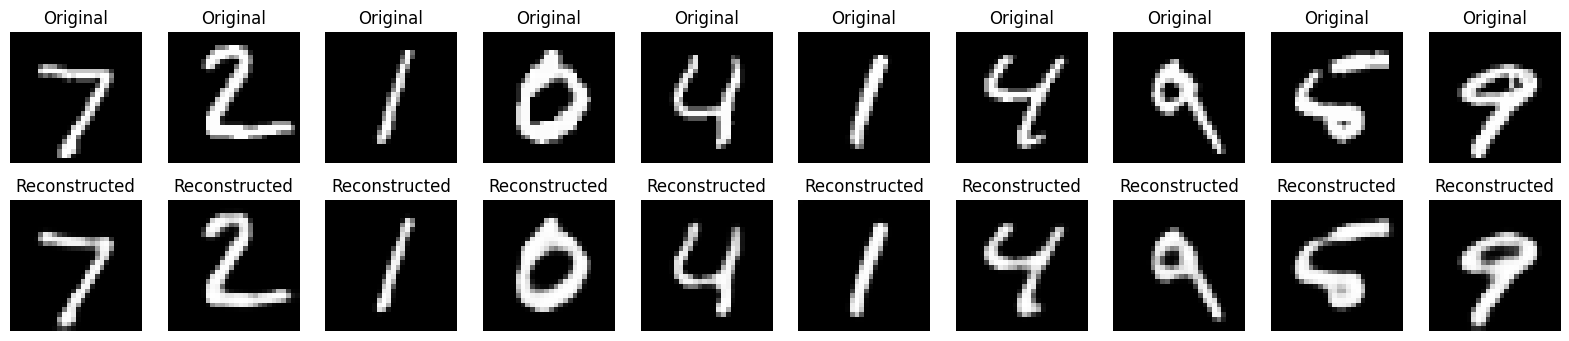

In [ ]:
# Display the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n) #This line was incorrectly indented. It is now properly indented to be part of the for loop
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

VANILLA AUTOENCODERS:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# Normalize the data (0-255 to 0-1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images from (28, 28) to (784,)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [ ]:
# Build the Vanilla Autoencoder model

# Encoder
input_img = layers.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

In [ ]:
# Decoder
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:

# Autoencoder model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
# Train the model
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.3425 - val_loss: 0.1649
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1563 - val_loss: 0.1360
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1340 - val_loss: 0.1233
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1227 - val_loss: 0.1162
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1165 - val_loss: 0.1122
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1129 - val_loss: 0.1091
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1101 - val_loss: 0.1067
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1072 - val_loss: 0.1039
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1044 - val_loss: 0.1018
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1025 - val_loss: 0.1000


In [ ]:
# Predict the reconstructed images
decoded_imgs = autoencoder.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


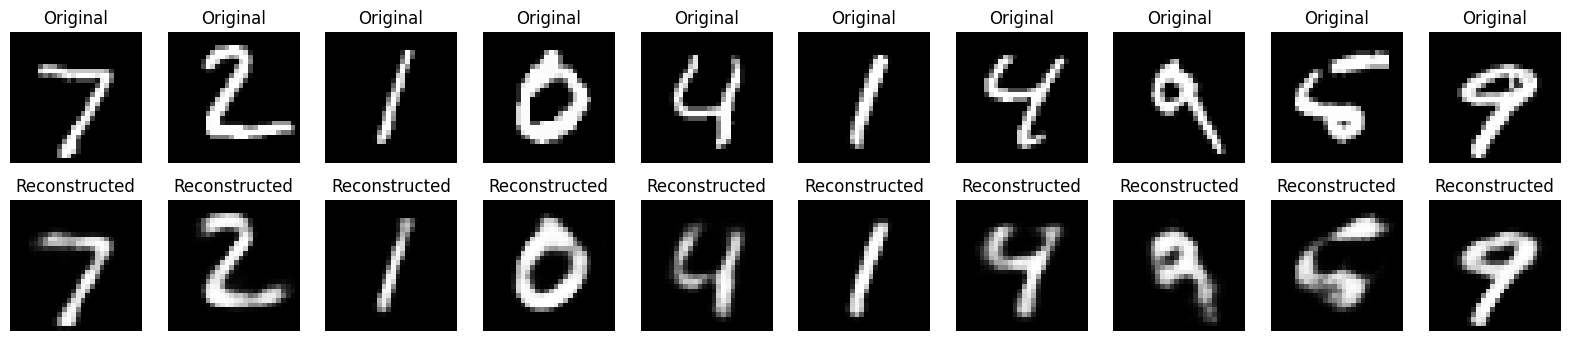

In [ ]:
# Display the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

DENOISING AUTOENCODERS:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# Normalize the data (0-255 to 0-1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the data to add the channel dimension
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [ ]:
# Add random noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


In [ ]:
# Clip the images to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [ ]:
# Build the Denoising Autoencoder

# Encoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


In [ ]:
# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [ ]:
# Autoencoder model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
# Train the model
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.3348 - val_loss: 0.1299
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1263 - val_loss: 0.1174
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1176 - val_loss: 0.1138
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1133 - val_loss: 0.1100
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1108 - val_loss: 0.1081
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1087 - val_loss: 0.1066
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1075 - val_loss: 0.1054
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1062 - val_loss: 0.1044
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1051 - val_loss: 0.1039
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1039 - val_loss: 0.1031


In [ ]:
# Predict the denoised images
denoised_imgs = autoencoder.predict(x_test_noisy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


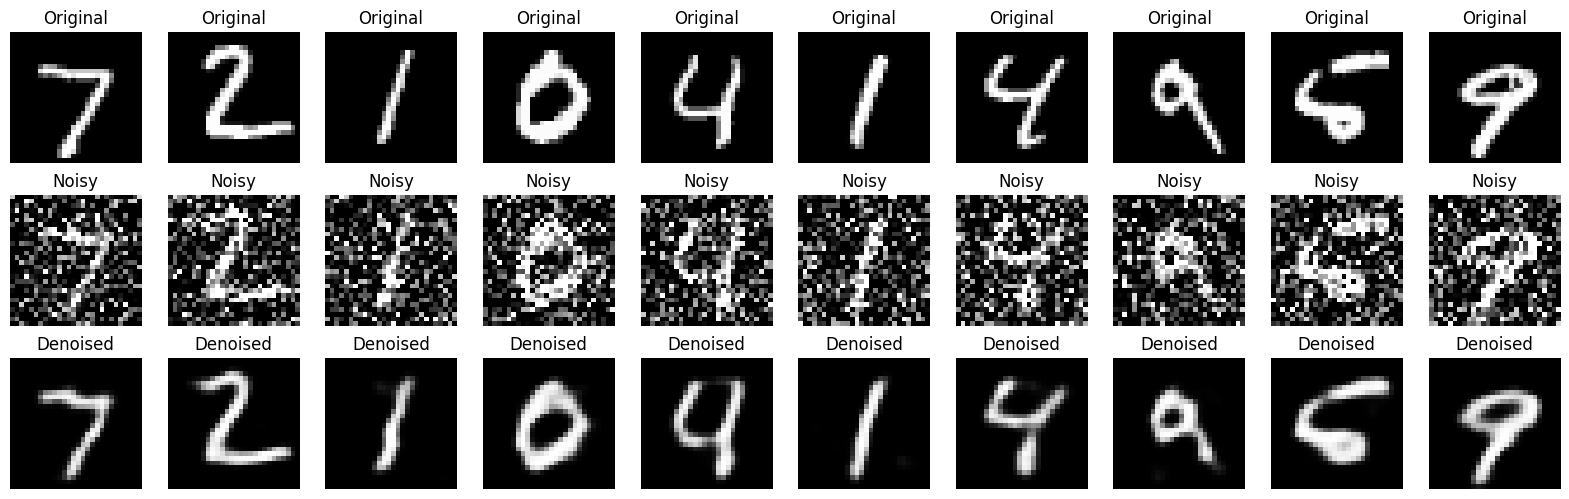

In [ ]:
# Display the original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
plt.show()

VARIATIONAL AUTOENCODERS:

In [ ]:
!pip install torch torchvision matplotlib


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4612346.66it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 66183.63it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1093453.20it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2920516.44it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1, Loss: 164.2684
Epoch 2, Loss: 121.6849
Epoch 3, Loss: 114.5314
Epoch 4, Loss: 111.5334
Epoch 5, Loss: 109.7793
Epoch 6, Loss: 108.6252
Epoch 7, Loss: 107.7681
Epoch 8, Loss: 107.1537
Epoch 9, Loss: 106.5784
Epoch 10, Loss: 106.1626


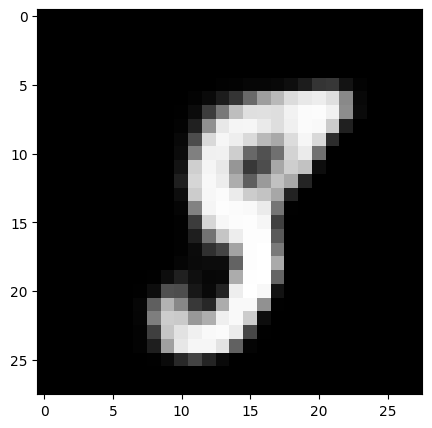

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Load the MNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(784, 400)
        self.fc21 = nn.Linear(400, 20)  # Mean
        self.fc22 = nn.Linear(400, 20)  # Log variance
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, 784)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

model = VAE()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Loss function (reconstruction + KL divergence)
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training loop
def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = Variable(data)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    print(f'Epoch {epoch}, Loss: {train_loss / len(train_loader.dataset):.4f}')

# Training the model
for epoch in range(1, 11):
    train(epoch)

# Visualizing the results
with torch.no_grad():
    z = torch.randn(64, 20)
    sample = model.decode(z).cpu()
    plt.figure(figsize=(5, 5))
    plt.imshow(sample[0].view(28, 28), cmap='gray')
    plt.show()
